In [56]:
import pandas as pd
import json
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
% matplotlib inline

# PSEUDO BRAINSTORM
- [ ] Predict category of news based on wording
- [ ] Display graphs of commonly used words per category
- [ ] Identify different writing styles, words used for various categories

In [2]:
PATH = "News_Category_Dataset_v2.json"

In [3]:
container = []

with open(PATH) as fr:
    for line in fr.readlines():
        row_obj = json.loads(line)
        container.append(row_obj)

df = pd.DataFrame(data=container, columns=["category", "headline", "authors", "link", "short_description", "date"])

In [41]:
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200853,200853,200853,200853,200853
unique,41,199344,27993,200812,178353,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.purpo...,,2013-12-04
freq,32739,90,36620,2,19712,100


In [42]:
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

Text(0, 0.5, 'Number of Articles')

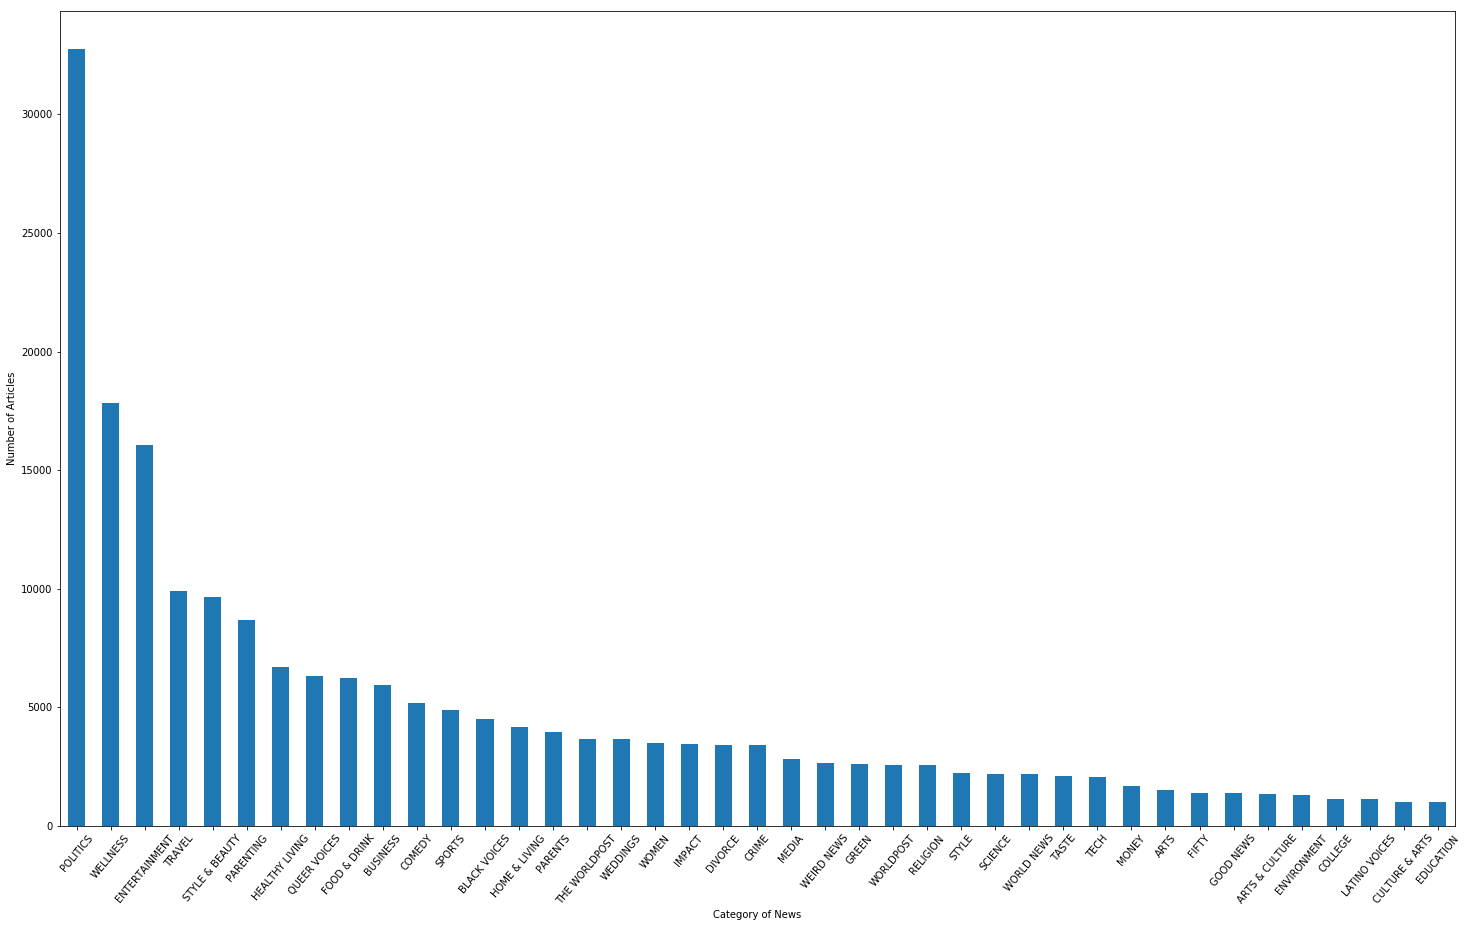

In [66]:
plt.figure(figsize=(25,15))
df['category'].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category of News")
plt.ylabel("Number of Articles")

# For exact counts on categories:
# df['category'].value_counts()

Text(0, 0.5, 'Number of Articles')

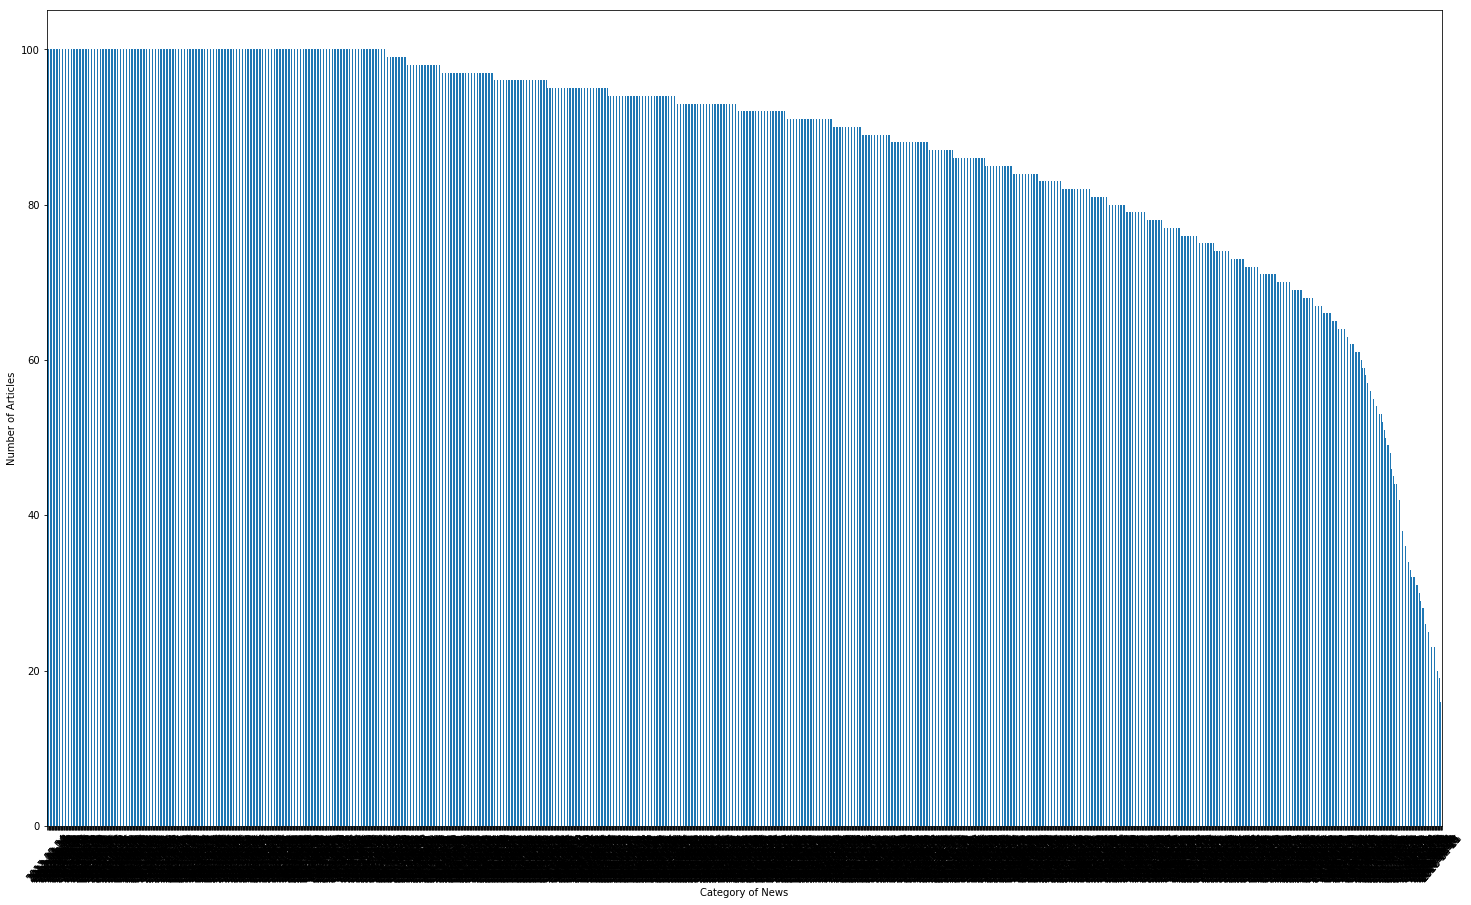

In [67]:
plt.figure(figsize=(25,15))
df['date'].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category of News")
plt.ylabel("Number of Articles")

# For exact counts on categories:
# df['category'].value_counts()

In [27]:
def show_5_category(category):
    return df[(df["category"] == category)][:5]

In [40]:
df_sample5 = []

for category in df['category'].unique():
    df_sample5.append(pd.DataFrame(data = show_5_category(category)))
    
df_sample5

[    category                                           headline  \
 0      CRIME  There Were 2 Mass Shootings In Texas Last Week...   
 32     CRIME  Rachel Dolezal Faces Felony Charges For Welfar...   
 40     CRIME  Man Faces Charges After Pulling Knife, Stun Gu...   
 42     CRIME        2 People Injured In Indiana School Shooting   
 185    CRIME  Maryland Police Charge 3 Church Leaders With P...   
 
              authors                                               link  \
 0    Melissa Jeltsen  https://www.huffingtonpost.com/entry/texas-ama...   
 32    Carla Herreria  https://www.huffingtonpost.com/entry/rachel-do...   
 40    Jenna Amatulli  https://www.huffingtonpost.com/entry/man-knife...   
 42       Marina Fang  https://www.huffingtonpost.com/entry/indiana-m...   
 185  Carol Kuruvilla  https://www.huffingtonpost.com/entry/maryland-...   
 
                                      short_description        date  
 0    She left her husband. He killed their children...  2018-

In [28]:
show_5_category("POLITICS")

,category,headline,authors,link,short_description,date
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...,Elise Foley and Roque Planas,https://www.huffingtonpost.com/entry/immigrant...,Last month a Health and Human Services officia...,2018-05-26
14,POLITICS,'Trump's Son Should Be Concerned': FBI Obtaine...,"Michael Isikoff, Yahoo News",https://www.huffingtonpost.com/entry/fbi-wiret...,The wiretaps feature conversations between Ale...,2018-05-26
15,POLITICS,Edward Snowden: There's No One Trump Loves Mor...,Mary Papenfuss,https://www.huffingtonpost.com/entry/edward-sn...,"But don't count on Robert Mueller to nail him,...",2018-05-26
16,POLITICS,Booyah: Obama Photographer Hilariously Trolls ...,Mary Papenfuss,https://www.huffingtonpost.com/entry/obama-pho...,Just a peeping minute.,2018-05-26
17,POLITICS,Ireland Votes To Repeal Abortion Amendment In ...,Laura Bassett,https://www.huffingtonpost.com/entry/results-f...,Irish women will no longer have to travel to t...,2018-05-26


In [18]:
df[(df["category"] == "WELLNESS")][:5]

,category,headline,authors,link,short_description,date
124989,WELLNESS,Why Overeating Doesn't Make You Fat,"Mark Hyman, MD, Contributor\nPracticing Physician",https://www.huffingtonpost.com/entry/overeatin...,If you take the right approach to ending your ...,2014-04-17
124990,WELLNESS,14 Habits Of People With A Healthy Relationshi...,Sarah Klein,https://www.huffingtonpost.com/entry/healthy-r...,After a long list of rules and habits like the...,2014-04-17
124993,WELLNESS,5 Things That Could Be Stealing Your Joy,"Amanda Gore, Contributor\nInternational keynot...",https://www.huffingtonpost.com/entry/joy_us_5b...,Listen to yourself all day today -- are you an...,2014-04-17
124994,WELLNESS,Moments Make a Life,"Megan McDonough, Contributor\nCEO, Wholebeing ...",https://www.huffingtonpost.com/entry/moments-m...,Consciously constructing positive habits -- or...,2014-04-17
124996,WELLNESS,Fat Facts,"Maria Rodale, Contributor\nCEO and Chairman of...",https://www.huffingtonpost.com/entry/fat-facts...,"Human fat cells, photo by Dr. Peeke Here's how...",2014-04-17


In [19]:
df[(df["category"] == "ENTERTAINMENT")][:5]

,category,headline,authors,link,short_description,date
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26


In [25]:
df[(df["category"] == "TRAVEL")][:5]

,category,headline,authors,link,short_description,date
126,TRAVEL,"14 Ways To Make Family Road Trips Easier, From...",Taylor Pittman,https://www.huffingtonpost.com/entry/family-ro...,Having waterproof covers on the seats is kind ...,2018-05-24
205,TRAVEL,14 Trips To Take From New York City On A Long ...,Caroline Bologna,https://www.huffingtonpost.com/entry/14-fun-lo...,"Charming towns, relaxing beaches and top hikin...",2018-05-23
206,TRAVEL,Disney Reveals Opening Seasons For 'Star Wars'...,Ed Mazza,https://www.huffingtonpost.com/entry/disney-st...,Star Wars: Galaxy's Edge will open at Disneyla...,2018-05-23
257,TRAVEL,Lonely Planet's Top European Destinations Of 2...,Brittany Nims,https://www.huffingtonpost.com/entry/lonely-pl...,These underrated travel destinations in Europe...,2018-05-22
325,TRAVEL,8 Majestic Islands In Europe That Most Tourist...,"PureWow, Editorial Partner",https://www.huffingtonpost.com/entry/8-majesti...,If you’re dreaming about a romantic European g...,2018-05-21


In [26]:
df[(df["category"] == "STYLE & BEAUTY")][:5]

,category,headline,authors,link,short_description,date
125004,STYLE & BEAUTY,Things You Need To Know Before You Get A Tatto...,"AskMen.com, Contributor\nContributor",https://www.huffingtonpost.com/entry/things-yo...,What's the number one thing you need to know a...,2014-04-17
125005,STYLE & BEAUTY,The Best Spring Colognes For Men,,https://www.huffingtonpost.comhttp://www.lifes...,Having a signature cologne shouldn't stop you ...,2014-04-17
125017,STYLE & BEAUTY,5 Fabulous Beauty Tips,"Christina-Lauren Pollack, Contributor\nLifesty...",https://www.huffingtonpost.com/entry/5-fabulou...,Beauty tips that will instantly make you look ...,2014-04-17
125025,STYLE & BEAUTY,Spring's Sexiest Peek-A-Boo Shoes,,https://www.huffingtonpost.comhttp://www.style...,When it comes to showing a little skin this sp...,2014-04-17
125034,STYLE & BEAUTY,Disney Princess Outfits Just Got A High Fashio...,Sara Roncero-Menendez,https://www.huffingtonpost.com/entry/disney-pr...,When fashion designers try their hand at a Dis...,2014-04-17
